In [10]:
from methods import *
from hyperseed_v2 import *

In [1]:
DIC= dict(zip(range(1,11),range(0,10)))

In [12]:
d =2000

In [14]:
from mnist import MNIST
import numpy as np
mndata = MNIST("..\\Hyperseed\\Data\\MNIST\\")
np.random.seed(0)
imagesTrain, labelsTrain = mndata.load_training()

imagesTest, labelsTest = mndata.load_testing()
   
imagesTrain, labelsTrain = np.array(imagesTrain), np.array(labelsTrain)
imagesTest, labelsTest = np.array(imagesTest), np.array(labelsTest)
trainSize = 5000
testSize = 2000
trainImageSet,trainLabelSet = imagesTrain[:trainSize]/255,labelsTrain[:trainSize]
inferImageSet, inferLabelSet = imagesTest[:testSize]/255,labelsTest[:testSize]



trX,trY = trainImageSet,trainLabelSet
teX,teY = inferImageSet,inferLabelSet

X,y = trX[:],trY[:]
X_test,y_test = teX[:],teY[:]# trX[tSize:],trY[tSize:]#teX[:],teY[:]
bits = d




from sklearn import decomposition
pca = decomposition.PCA()
compSize=784#784#300
pca.n_components = compSize
model = pca.fit(X)#
# X=model.transform(X)
# X_test=model.transform(X_test)


import numpy as np

#### Random project data from 784 to dimension d

np.random.seed(4) ## 4
rnd_project =  2 * np.pi * np.random.rand(compSize, bits) # random angles
rnd_project = 1 * np.exp(1j * rnd_project).real # create a phasor vector


print(X.shape,rnd_project.shape)
TR_D = np.matmul(X,rnd_project)#X#np.matmul(X,rnd_project)
TR_D_test=np.matmul(X_test,rnd_project)#X_test#np.matmul(X_test,rnd_project)


d = bits

### Use fft to make the vectors complex

HD_X_shuffeled,y_shuffeled = np.fft.fft(TR_D),y
HD_X_shuffeled_test,y_shuffeled_test = np.fft.fft(TR_D_test),y_test


numClasses=10
num_classes=numClasses
classes = [[] for _ in range(numClasses)]
classes_test = [[] for _ in range(numClasses)]
for i in range(len(HD_X_shuffeled)):
    classes[int(y_shuffeled[i])].append(HD_X_shuffeled[i])
    
for i in range(len(HD_X_shuffeled_test)):
    classes_test[int(y_shuffeled_test[i])].append(HD_X_shuffeled_test[i])
    
    
samplesPerClass=[len(i) for i in classes]
samplesPerClassTest=[len(i) for i in classes_test]

selected_classes= range(10)#[0,1,2,3, 4]# range(10)# [0,1,2,3, 4]
TR_perm = np.concatenate(([classes[i] for i in selected_classes]), axis = 0)
TR_L_perm = np.concatenate(([[i+1]*samplesPerClass[i] for i in selected_classes]), axis = 0)

TE_perm = np.concatenate(([classes_test[i] for i in selected_classes]), axis = 0)
TE_L_perm = np.concatenate(([[i+1]*samplesPerClassTest[i] for i in selected_classes]), axis = 0)

(5000, 784) (784, 2000)


In [15]:
levels=20
stats = []
for level in range(2,levels):
    nodes=100
    sim_bases=0.015#15
    np.random.seed(0)
    seed,bases,CodeBooks=HyperSeed_2(TR_perm,TR_L_perm,TE_perm,TE_L_perm,sim_bases,level,nodes,d)

    c = []
    for i in range(100):
        I = np.random.randint(low=0, high=len(TE_perm), size=(1,))
        hd_new = TE_perm[I];
        Ibmu = seed * np.conj(hd_new);
        Ibmu = np.array(Ibmu).reshape((d,))
        inds,work=findCoordinates(Ibmu,CodeBooks)

    
        factor = np.ones(np.array(CodeBooks).shape[2]).astype('complex128')
        for j in range(len(bases)):
            factor*= CodeBooks[j][int(inds[j])]

        c.append(cosineSimiliraty(Ibmu,factor).real)
    stats.append(sum(c)/len(c))


SELECTED sample:  4977
SELECTED sample:  446
SELECTED sample:  4977
SELECTED sample:  446
SELECTED sample:  1041
SELECTED sample:  4977
SELECTED sample:  446
SELECTED sample:  1041
SELECTED sample:  449
SELECTED sample:  4977
SELECTED sample:  446
SELECTED sample:  1041
SELECTED sample:  449
SELECTED sample:  3662
SELECTED sample:  4977
SELECTED sample:  446
SELECTED sample:  1041
SELECTED sample:  449
SELECTED sample:  3662
SELECTED sample:  1196
SELECTED sample:  4977
SELECTED sample:  446
SELECTED sample:  1041
SELECTED sample:  449
SELECTED sample:  3662
SELECTED sample:  1196
SELECTED sample:  341
SELECTED sample:  4977
SELECTED sample:  446
SELECTED sample:  1041
SELECTED sample:  449
SELECTED sample:  3662
SELECTED sample:  1196
SELECTED sample:  341
SELECTED sample:  679
SELECTED sample:  4977
SELECTED sample:  446
SELECTED sample:  1041
SELECTED sample:  449
SELECTED sample:  3662
SELECTED sample:  1196
SELECTED sample:  341
SELECTED sample:  679
SELECTED sample:  2340
SELECTE

In [17]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})# stats

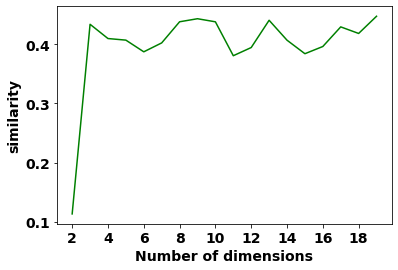

In [19]:
# data to be plotted
x = np.arange(2, levels).astype('int')
y = np.array(stats)

plt.xlabel("Number of dimensions")
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.ylabel("similarity")
plt.plot(x, y, color ="green")
plt.show()